In [2]:
# Calcula un índice por país de vulnerabilidad
# socioeconómica ante riesgos de transición

# Importamos librerías
import numpy as np
import pandas as pd
import geopandas as gpd
import geoviews as gv
from scipy import stats

# Parámetros de mapas
gv.extension("matplotlib")
def hook(plot, element):
    cax = plot.handles["cax"]
    ax = plot.handles["axis"]
    bbox = ax.get_position()
    l, b, w, h = bbox.x0, bbox.y0, bbox.width, bbox.height
    cax.set_position([l, 0.9*b, w, 0.05*h])
options = { "colorbar": True, "linewidth": 0.4,
    "hooks": [hook], "ylim":(-62,85), "xlim":(-180,180),
    "colorbar_opts": {"orientation": "horizontal"} }
options_m = { "bgcolor": "lightgray", "fontscale": 2, "aspect": 2.25 }

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [3]:
# Datos

# Códigos nacionales
ix  = "ISO_A3"

# Carpetas
path_r = "../results/"

# Catálogo de datos
path_catalog = "../../Bases_de_datos/Data_catalog.csv"
df_c = pd.read_csv(path_catalog)

# Mapa
borders_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_admin_0_countries_mod" )
borders = gpd.read_file(borders_path).drop(
    columns = [ix] ).set_index("ISO_A3_EH")
borders.index.name = ix
borders = borders[ borders["ISO_N3_EH"] != "-99" ]
borders = borders[ ~borders.index.duplicated() ]

# Océano
ocean_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_ocean" )
ocean = gv.Polygons( gpd.read_file(ocean_path), vdims = "min_zoom"
    ).opts( linewidth = 0, cmap = "Paired")

# Tabla base
iso = "../../Bases_de_datos/Country_ISO_code.csv"
df_iso = pd.read_csv(iso).set_index("alpha-3")
df_iso = df_iso.drop( ["ATA", "ATF", "HMD", "SJM", "SXM", "VAT",
    "BVT", "SGS", "UMI", "ESH", "TKL", "IOT"] )
df_iso.index.name = ix

# Nombres de variables a usar
vars = [
    "Mean years of schooling",
    "Scientific articles per million inhabitants",
    "Young workforce ratio (20-44 to 45-64 years old)",
    "Gender inequality index",
    "Total debt service [% of GNI]",
    "Central government debt [% of GDP]",
    "Gini index"
    ]
var_i = [v + "_index" for v in vars]

In [4]:
# Funciones a utilizar

def display(vn, p = False, format = "{:.1f}",
    category = "", type = "category"):
    # Países sin datos
    no_d = df_iso[ df_iso[vn].isnull() ].shape[0]
    print( f"Countries without data: {no_d} countries" )

    if   type == "index":
        disp = df_iso.loc[ df_iso[vn].notnull(),
            ["name", vn] + var_i ].sort_values(
            vn, ascending = p ).reset_index(drop = True).head(15).copy()
    elif type == "category":
        disp = df_iso.loc[ df_iso[vn].notnull(), ["name", vn] ].sort_values(
            vn, ascending = p ).reset_index(drop = True).head(15).copy()
    c_list = list( disp[ ["name", vn]
        ].sort_values(vn, ascending = p).head(5)["name"].values )
    print(f"Most vulnerable countries: {', '.join(c_list)}")

    cats = [ "", "", "", "", "", "", "SIDS", "LDC", "LLDC",
        "Asia", "Europe", "Africa", "Oceania", "Americas" ]

    for r, cat in enumerate(cats[:9]):
        if r in range(0, 6): pass
        else:
            disp.iloc[r, 0] = cat
            if   type == "index":
                disp.iloc[r, 1:] = df_iso.loc[
                    df_iso[cat], [vn] + var_i ].mean()
            elif type == "category":
                disp.iloc[r, 1] = df_iso.loc[df_iso[cat], vn].mean()
            c_list = list( df_iso.loc[df_iso[cat], ["name", vn]
                ].sort_values( vn, ascending = p
                ).head(5)["name"].values )
            print(f"Most vulnerable {cat}: {', '.join(c_list)}")

    for r, cat in enumerate(cats):
        if r in range(0, 9): pass
        else:
            disp.iloc[r, 0] = cat
            if   type == "index":
                disp.iloc[r, 1:] = df_iso.loc[
                    df_iso["region"] == cat, [vn] + var_i ].mean()
            elif type == "category":
                disp.iloc[r, 1] = df_iso.loc[
                    df_iso["region"] == cat, vn].mean()

    cat = "World"
    r = 14
    disp.iloc[r, 0] = cat
    if   type == "index":
        disp.iloc[r, 1:] = df_iso[ [vn] + var_i ].mean()
    elif type == "category":
        disp.iloc[r, 1] = df_iso[vn].mean()
    
    if   type == "index":
        cols = ["Name", vn] + var_i
    elif type == "category":
        cols = [ "Name", f"{category}" ]
    disp.columns = cols

    if   type == "index":
        disp = disp.style.format(
            dict(zip(cols[1:], ["{:.1f}"] * len(cols[1:]))) )
    elif type == "category":
        disp = disp.style.format( { cols[1]: format } )

    return disp

min: 1.3, max: 14.3


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Mean years of schooling)
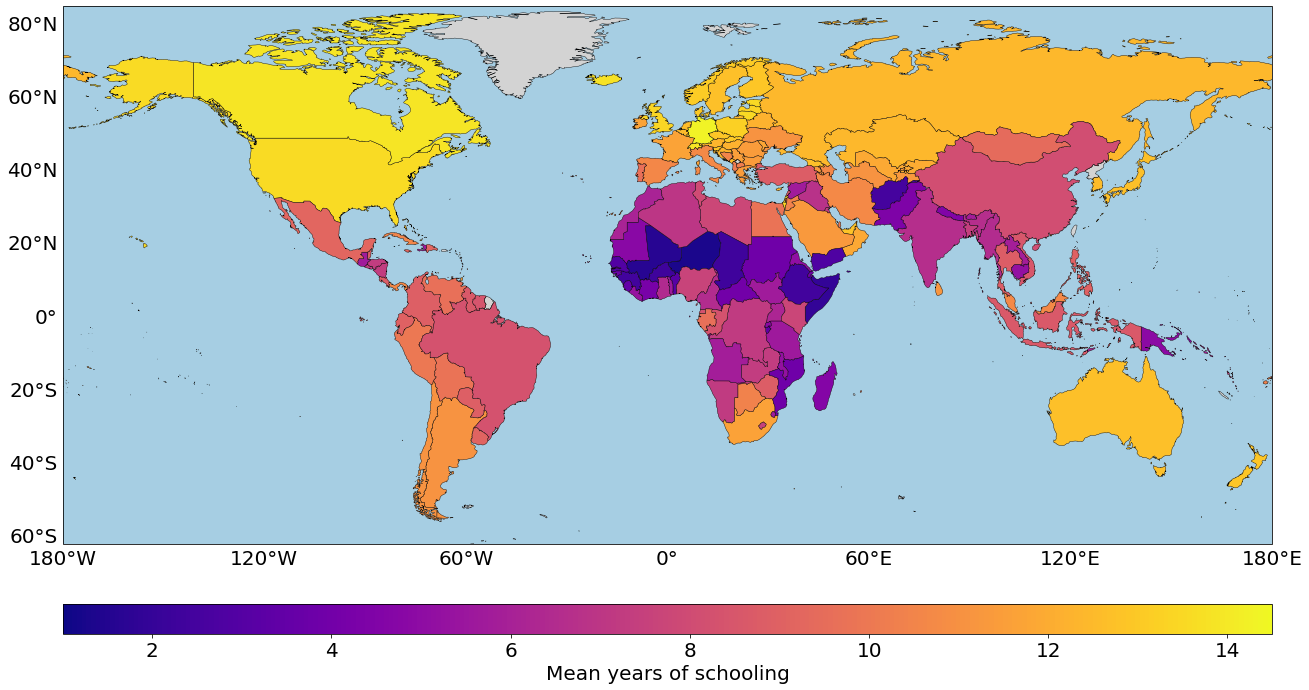

Countries without data: 44 countries
Most vulnerable countries: Niger, Mali, Somalia, Chad, Burkina Faso
Most vulnerable SIDS: Guinea-Bissau, Papua New Guinea, Haiti, Sao Tome and Principe, Solomon Islands
Most vulnerable LDC: Niger, Mali, Somalia, Burkina Faso, Chad
Most vulnerable LLDC: Niger, Mali, Chad, Burkina Faso, Ethiopia


,Name,Mean years of schooling
0,Niger,1.3
1,Mali,1.6
2,Somalia,1.9
3,Chad,2.3
4,Burkina Faso,2.3
5,Guinea,2.4
6,SIDS,9.1
7,LDC,4.8
8,LLDC,7.1
9,Asia,9.2


In [5]:
# Mean years of schooling

# Cargamos el archivo de desarrollo
id = "GDI_HDI"
df = pd.read_csv( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0],
    index_col = ix ).drop(columns = ["Source"])
df_iso["SVN_A3"] = df["SVN_A3"]

# Seleccionamos la variable
i = 0
df_iso = df_iso.reset_index().set_index(ix)
df_iso[vars[i]] = df[vars[i]]

# Mapa
borders[vars[i]] = df_iso[vars[i]]
print(f"min: {borders[vars[i]].min()}, max: {borders[vars[i]].max()}")
# borders[vars[i]].dropna().sort_values()
min = 1
max = 14.5
map_v = gv.Polygons( borders, vdims = gv.Dimension( vars[i],
    range = (min, max) ) ).opts( cmap = "plasma", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países más vulnerables
disp = display(vars[i], p = True, category = vars[i])
disp

min: 0.8823044714212364, max: 2691.0194858628133


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Scientific articles per million inhabitants)
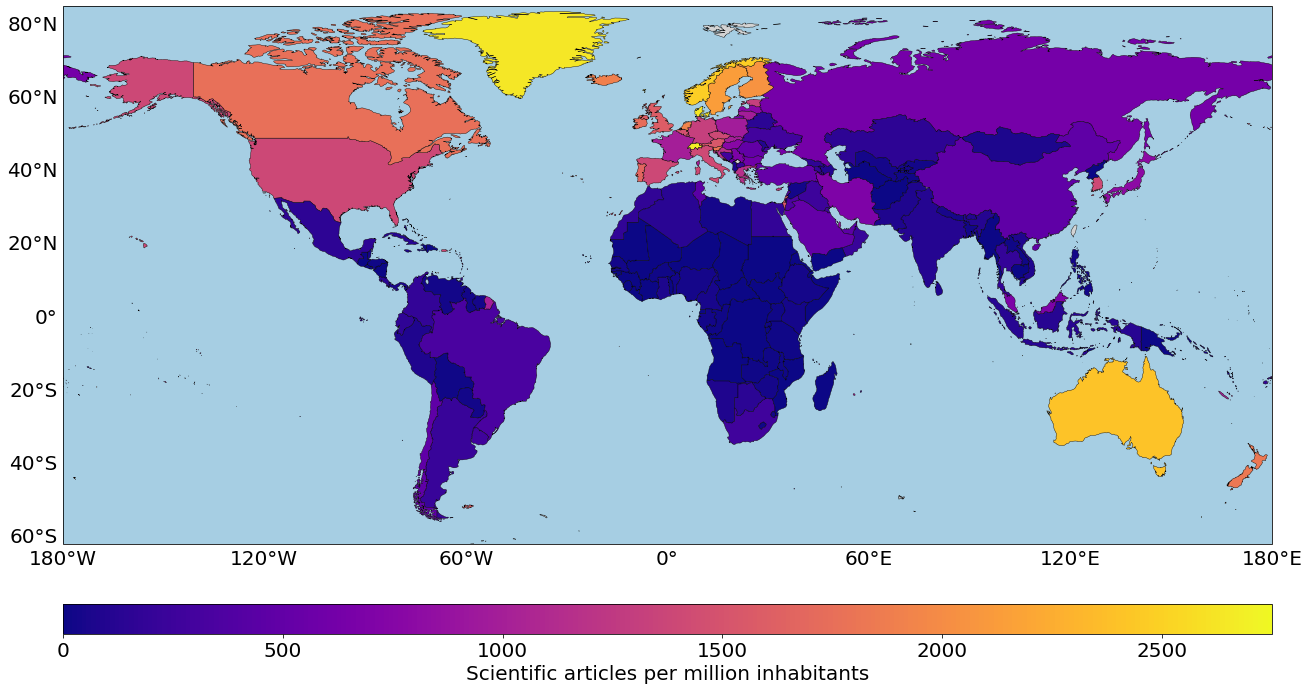

Countries without data: 3 countries
Most vulnerable countries: Chad, Turkmenistan, Equatorial Guinea, South Sudan, Angola
Most vulnerable SIDS: Haiti, Comoros, Papua New Guinea, Guinea-Bissau, Dominican Republic
Most vulnerable LDC: Chad, South Sudan, Angola, Congo, Democratic Republic of the, Liberia
Most vulnerable LLDC: Chad, Turkmenistan, South Sudan, Niger, Burundi


,Name,Scientific articles per million inhabitants
0,Chad,0.9
1,Turkmenistan,0.9
2,Equatorial Guinea,1.3
3,South Sudan,1.3
4,Angola,1.4
5,"Congo, Democratic Republic of the",2.0
6,SIDS,593.0
7,LDC,12.6
8,LLDC,46.3
9,Asia,324.6


In [6]:
# Scientific articles per million inhabitants
id = "IP.JRN.ARTC.SC"

# Cargamos el archivo
df_i = pd.read_csv( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0], skiprows = 3
    ).rename( columns = {"Country Code": ix} ).set_index(ix)

# Seleccionamos la variable
i = 1
df_iso = df_iso.reset_index().set_index("SVN_A3")
df_iso[vars[i]] = df_i.iloc[ :, 4:-1 ].ffill(axis = 1).iloc[:, -1]
df_iso["POP_EST"] = borders["POP_EST"]
df_iso[vars[i]] = df_iso [vars[i]] / df_iso ["POP_EST"] * 1e6

# Mapa
borders[vars[i]] = df_iso.reset_index().set_index(ix)[vars[i]]
print(f"min: {borders[vars[i]].min()}, max: {borders[vars[i]].max()}")
# borders[vars[i]].dropna().sort_values()
min = 0
max = 2750
map_v = gv.Polygons( borders, vdims = gv.Dimension( vars[i],
    range = (min, max)) ).opts( cmap = "plasma", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países más vulnerables
disp = display(vars[i], p = True, category = vars[i], format = "{:,.1f}")
disp

min: 0.664783427495292, max: 2.8960718244797614


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Young workforce ratio (20-44 to 45-64 years old))
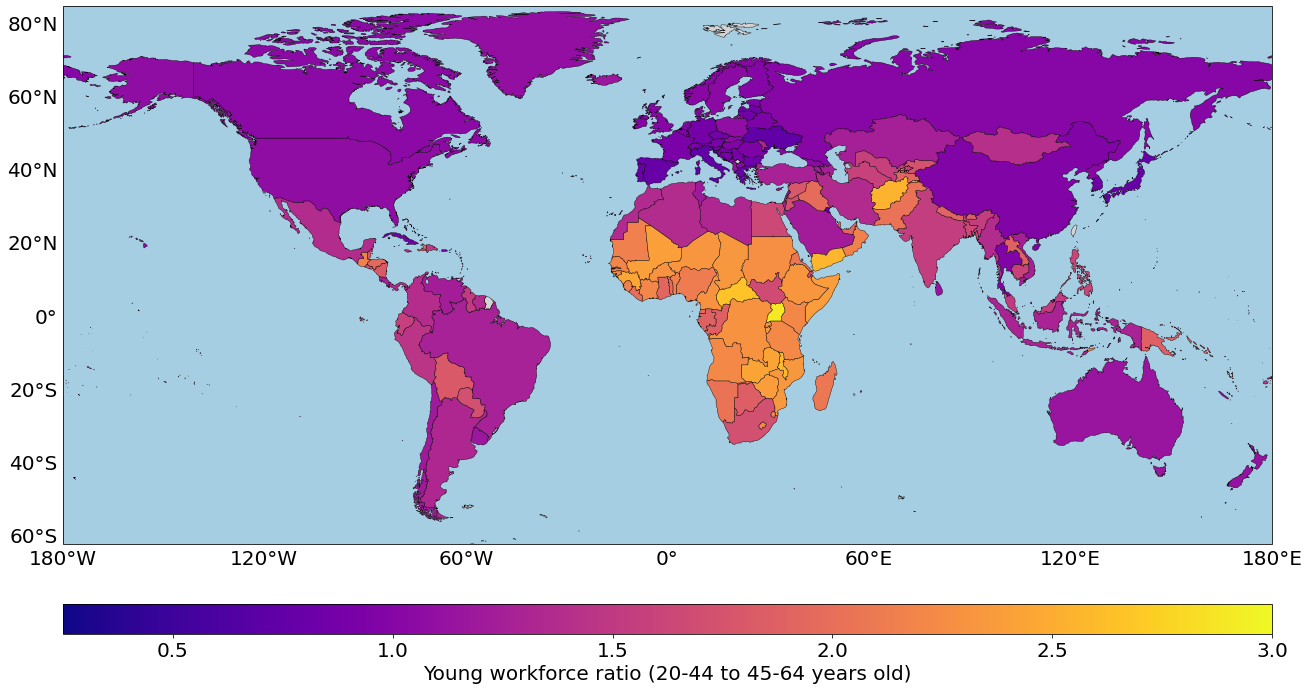

Countries without data: 23 countries
Most vulnerable countries: San Marino, Northern Mariana Islands, Bermuda, Saint Martin (French part), Kuwait
Most vulnerable SIDS: Northern Mariana Islands, Bermuda, Virgin Islands (U.S.), Aruba, Cuba
Most vulnerable LDC: Myanmar, Tuvalu, Cambodia, Bangladesh, South Sudan
Most vulnerable LLDC: North Macedonia, Armenia, Kazakhstan, Azerbaijan, Moldova, Republic of


,Name,Young workforce ratio (20-44 to 45-64 years old)
0,San Marino,0.66
1,Northern Mariana Islands,0.71
2,Bermuda,0.72
3,Saint Martin (French part),0.72
4,Kuwait,0.73
5,Italy,0.74
6,SIDS,1.37
7,LDC,2.15
8,LLDC,1.98
9,Asia,1.49


In [7]:
# Young workforce

# Cargamos el archivo de población
id = "Population"

# Cargamos el archivo
df_i = pd.read_csv( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0], index_col = "Country Code")
df_i.index.name = ix

v_pop = [
    "SP.POP.2024.FE", "SP.POP.2024.MA", "SP.POP.2529.FE",
    "SP.POP.2529.MA", "SP.POP.3034.FE", "SP.POP.3034.MA",
    "SP.POP.3539.FE", "SP.POP.3539.MA", "SP.POP.4044.FE",
    "SP.POP.4044.MA", "SP.POP.4549.FE", "SP.POP.4549.MA",
    "SP.POP.5054.FE", "SP.POP.5054.MA", "SP.POP.5559.FE",
    "SP.POP.5559.MA", "SP.POP.6064.FE", "SP.POP.6064.MA" 
    ]
for v in v_pop:
    df[v] = df_i.loc[ df_i["Indicator Code"] == v, "2023" ]


# Seleccionamos la variable
i = 2
df_iso = df_iso.reset_index().set_index(ix)
df_iso[vars[i]] = df[v_pop[0:10]].sum(axis = 1) / df[v_pop[8:]].sum(axis = 1)

# Mapa
borders[vars[i]] = df_iso[vars[i]]
# Eliminamos Lietchtenstein por motivos de visualización
#borders.loc["MCO"] = np.nan
print(f"min: {borders[vars[i]].min()}, max: {borders[vars[i]].max()}")
# borders[vars[i]].dropna().sort_values()
min = 0.25
max = 3
map_v = gv.Polygons( borders, vdims = gv.Dimension( vars[i],
    range = (min, max) ) ).opts( cmap = "plasma", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países más vulnerables
disp = display(vars[i], p = True, category = vars[i], format = "{:.2f}")
disp

min: 0.009, max: 0.82


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Gender inequality index)
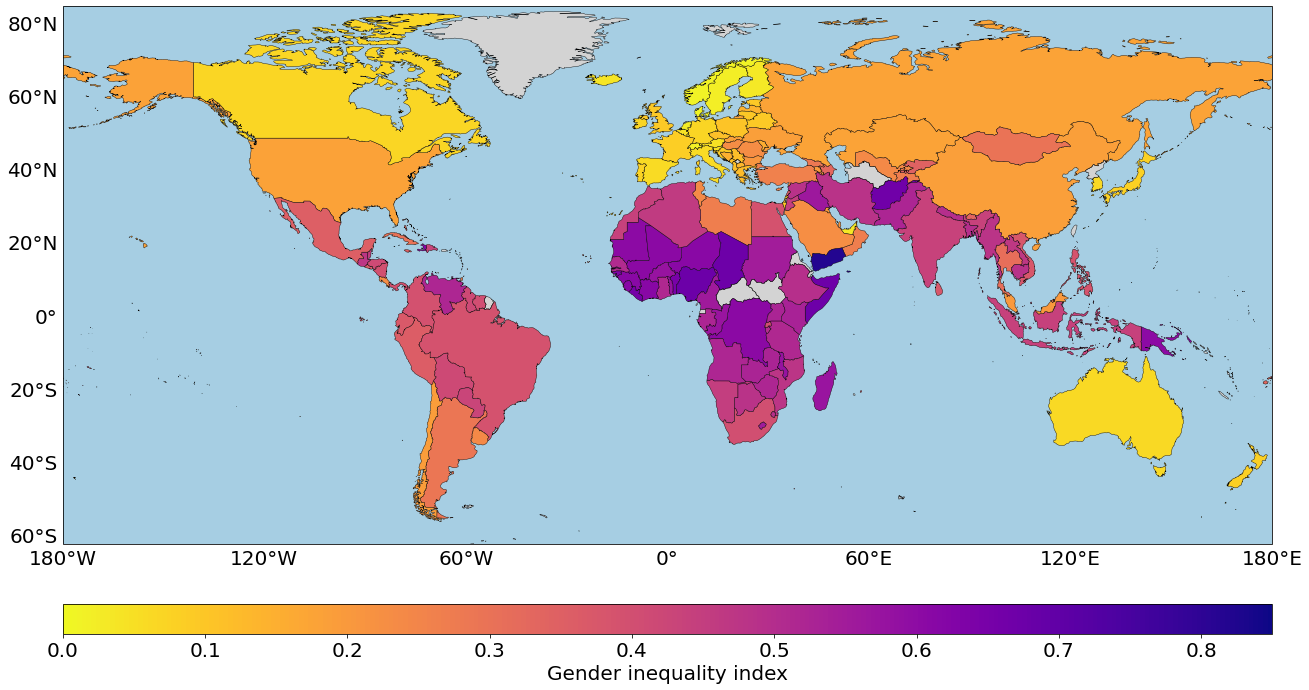

Countries without data: 71 countries
Most vulnerable countries: Yemen, Nigeria, Somalia, Chad, Afghanistan
Most vulnerable SIDS: Guinea-Bissau, Haiti, Papua New Guinea, Tonga, Belize
Most vulnerable LDC: Yemen, Somalia, Chad, Afghanistan, Liberia
Most vulnerable LLDC: Chad, Afghanistan, Niger, Mali, Malawi


,Name,Gender inequality index
0,Yemen,0.820
1,Nigeria,0.677
2,Somalia,0.674
3,Chad,0.671
4,Afghanistan,0.665
5,Liberia,0.656
6,SIDS,0.387
7,LDC,0.564
8,LLDC,0.431
9,Asia,0.331


In [8]:
# Gender inequality index

# Seleccionamos la variable
i = 3
df_iso = df_iso.reset_index().set_index(ix)
df_iso[vars[i]] = df[vars[i]]

# Mapa
borders[vars[i]] = df_iso[vars[i]]
# Eliminamos Mónaco por motivos de visualización
#borders.loc["MCO"] = np.nan
print(f"min: {borders[vars[i]].min()}, max: {borders[vars[i]].max()}")
# borders[vars[i]].dropna().sort_values()
min = 0
max = 0.85
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países más vulnerables
disp = display(vars[i], p = False, category = vars[i], format = "{:.3f}")
disp

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Total debt service [% of GNI])
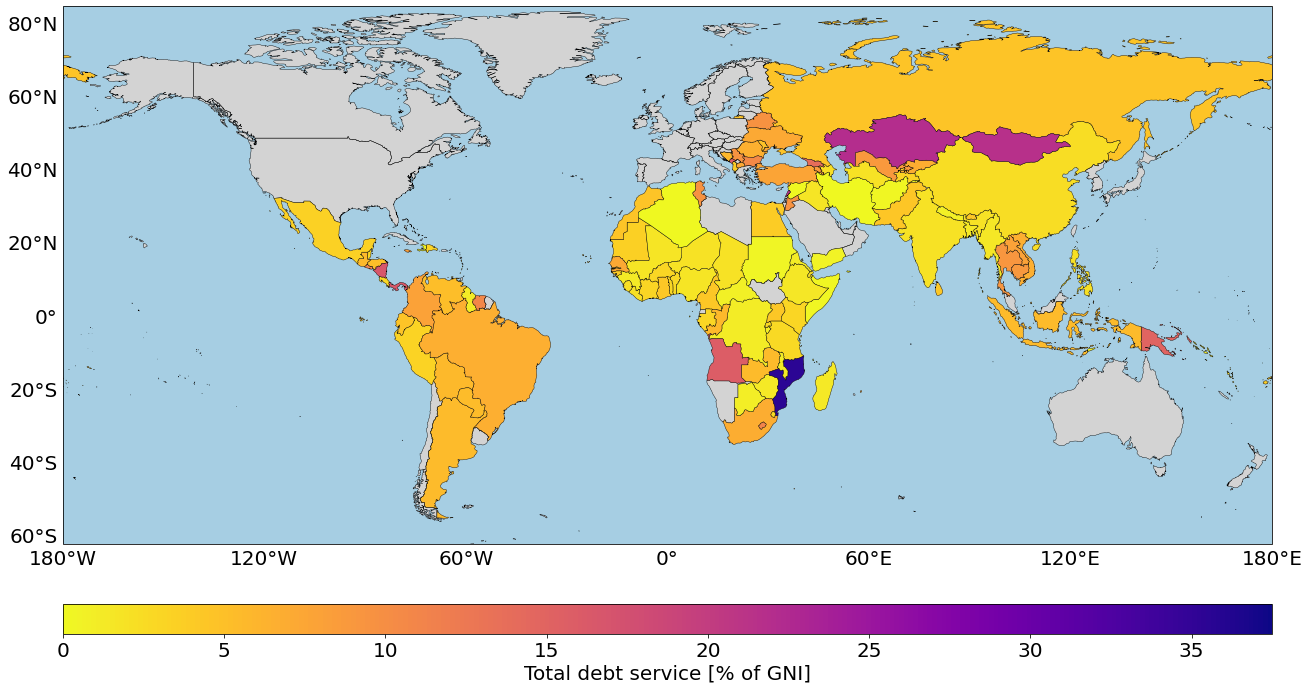

Countries without data: 113 countries
Most vulnerable countries: Mozambique, Kazakhstan, Mongolia, Lebanon, Nicaragua
Most vulnerable SIDS: Papua New Guinea, Maldives, Suriname, Jamaica, Mauritius
Most vulnerable LDC: Mozambique, Angola, Lesotho, Cambodia, Lao People's Democratic Republic
Most vulnerable LLDC: Kazakhstan, Mongolia, Lesotho, Uzbekistan, Armenia


,Name,Total debt service [% of GNI]
0,Mozambique,35.6
1,Kazakhstan,22.1
2,Mongolia,21.5
3,Lebanon,20.9
4,Nicaragua,16.6
5,Panama,16.4
6,SIDS,4.4
7,LDC,3.6
8,LLDC,5.0
9,Asia,6.2


In [9]:
# Total debt service [% of GNI]
id = "DT.TDS.DECT.GN.ZS"

# Cargamos el archivo
df_i = pd.read_csv( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0], skiprows = 3
    ).rename( columns = {"Country Code": ix} ).set_index(ix)

# Seleccionamos la variable
i = 4
df_iso = df_iso.reset_index().set_index("SVN_A3")
df_iso[vars[i]] = df_i.iloc[ :, 4:-1 ].ffill(axis = 1).iloc[:, -1]

# Mapa
borders[vars[i]] = df_iso.reset_index().set_index(ix)[vars[i]]
min = 10 * np.floor( borders[vars[i]].min() * 0.1 )
max = 37.5#10 * np.ceil( borders[vars[i]].max() * 0.1 )
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países más vulnerables
disp = display(vars[i], p = False, category = vars[i])
disp

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Central government debt [% of GDP])
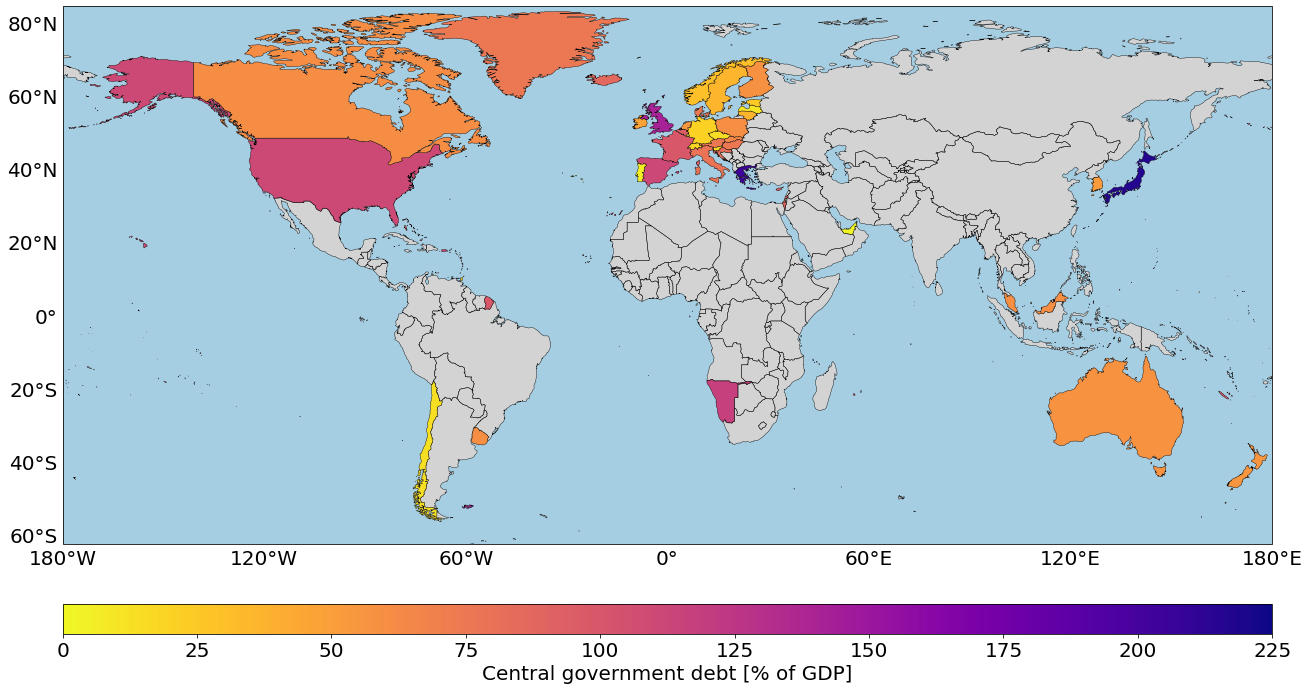

Countries without data: 145 countries
Most vulnerable countries: Japan, Greece, Singapore, Barbados, Guernsey
Most vulnerable SIDS: Singapore, Barbados, Virgin Islands (British), Turks and Caicos Islands, Bermuda
Most vulnerable LDC: Afghanistan, Angola, Bangladesh, Benin, Burkina Faso
Most vulnerable LLDC: Afghanistan, Armenia, Azerbaijan, Bhutan, Bolivia (Plurinational State of)


,Name,Central government debt [% of GDP]
0,Japan,216.2
1,Greece,203.3
2,Singapore,150.1
3,Barbados,146.5
4,Guernsey,142.3
5,Isle of Man,142.3
6,SIDS,94.4
7,LDC,nan
8,LLDC,nan
9,Asia,96.9


In [10]:
# Central government debt [% of GDP]
id = "GC.DOD.TOTL.GD.ZS"

# Cargamos el archivo
df_i = pd.read_csv( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0], skiprows = 3
    ).rename( columns = {"Country Code": ix} ).set_index(ix)

# Seleccionamos la variable
i = 5
df_iso = df_iso.reset_index().set_index("SVN_A3")
df_iso[vars[i]] = df_i.iloc[ :, 4:-1 ].ffill(axis = 1).iloc[:, -1]
df_iso[vars[i]] = df_iso[vars[i]].where( df_iso[vars[i-1]].isnull(), np.nan )

# Mapa
borders[vars[i]] = df_iso.reset_index().set_index(ix)[vars[i]]
min = 10 * np.floor( borders[vars[i]].min() * 0.1 )
max = 225#np.ceil( borders[vars[i]].max() )
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países más vulnerables
disp = display(vars[i], p = False, category = vars[i])
disp

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Gini index)
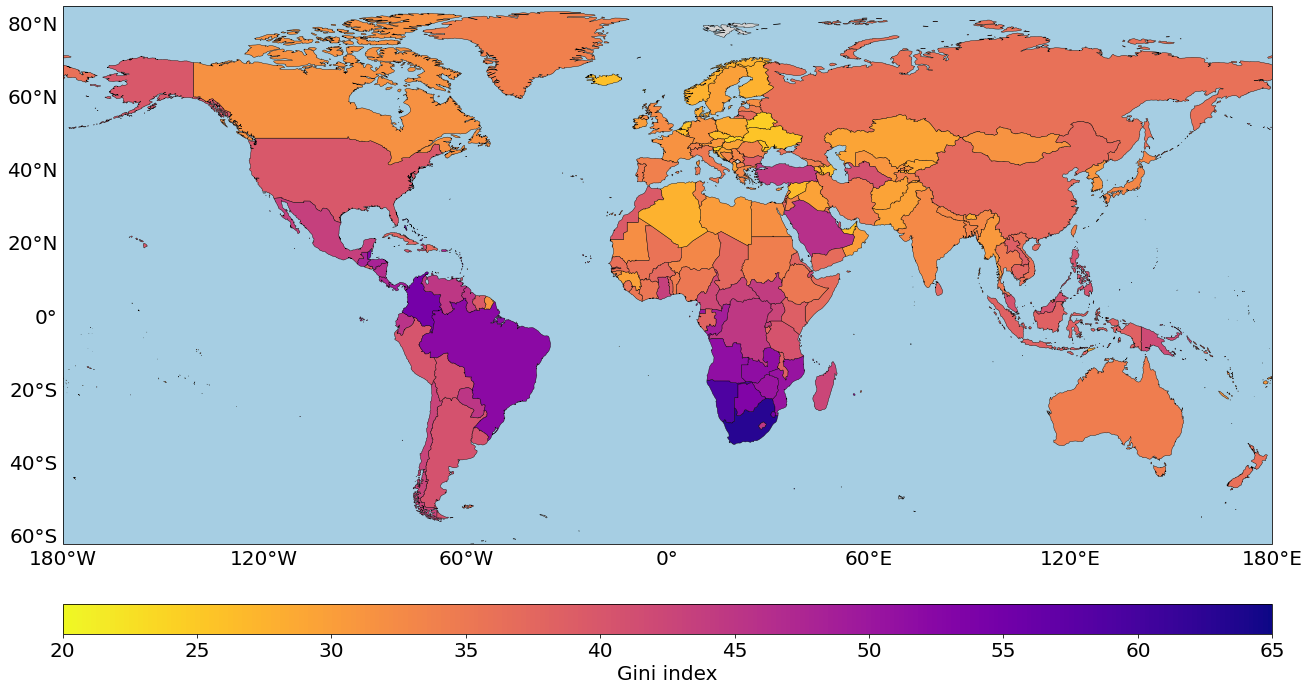

Countries without data: 0 countries
Most vulnerable countries: South Africa, Bermuda, Bahrain, Namibia, Bahamas
Most vulnerable SIDS: Bermuda, Bahamas, Belize, Martinique, Aruba
Most vulnerable LDC: Zambia, Angola, Mozambique, Comoros, Lesotho
Most vulnerable LLDC: Eswatini, Botswana, Zambia, Zimbabwe, Paraguay


,Name,Gini index
0,South Africa,63.0
1,Bermuda,63.0
2,Bahrain,59.6
3,Namibia,59.1
4,Bahamas,57.5
5,Colombia,54.8
6,SIDS,39.6
7,LDC,38.1
8,LLDC,37.7
9,Asia,34.9


In [11]:
# Gini coefficient
id = "SI.POV.GINI"

# Cargamos el archivo
df_i = pd.read_csv( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0][:-4] + "_extra.csv",
    skiprows = 4 ).rename( columns = {"Country Code": ix}
    ).drop(columns = ["Source"])

# Seleccionamos la variable
i = 6
df_iso = df_iso.reset_index().set_index(ix)
df_iso[vars[i]] = df_i.set_index(ix).iloc[ :, 4: ].ffill(axis = 1).iloc[:, -1]

# Mapa
borders[vars[i]] = df_iso[vars[i]]
min = 5 * np.floor( borders[vars[i]].min() * 0.2 )
max = 5 * np.ceil( borders[vars[i]].max() * 0.2 )
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países más vulnerables
disp = display(vars[i], p = False, category = vars[i])
disp

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Social vulnerability index, climate transition impacts)
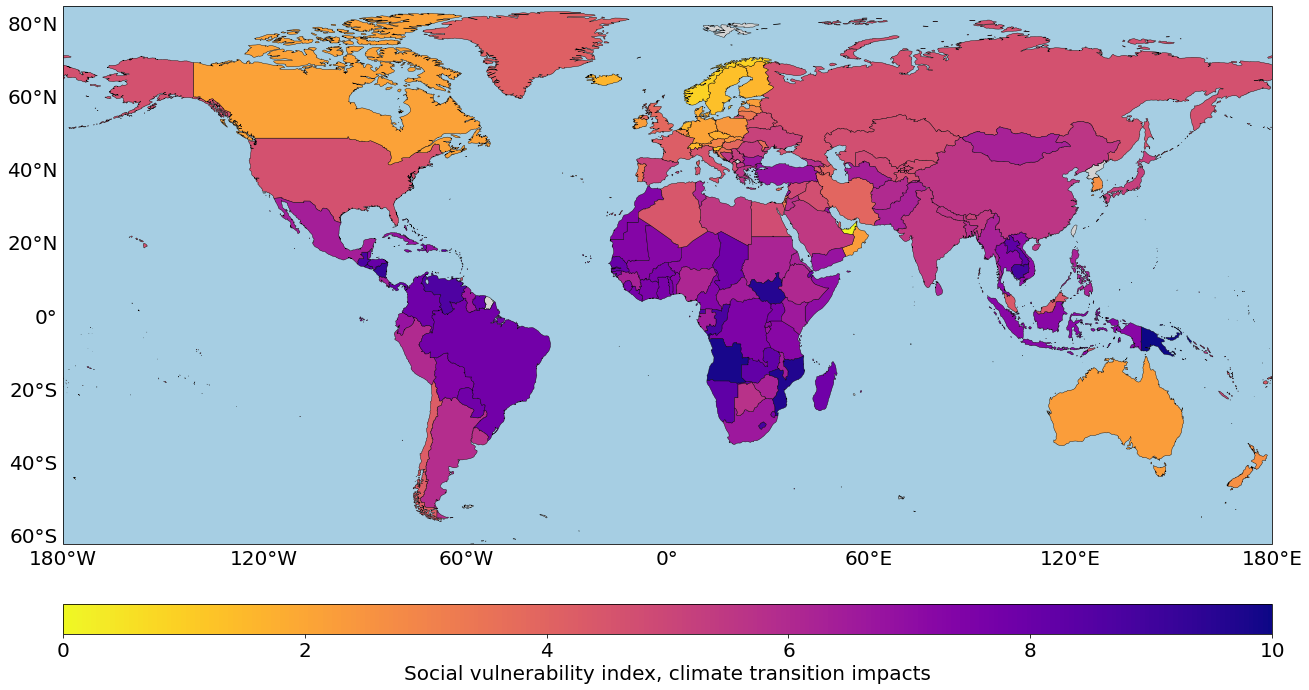

Countries without data: 0 countries
Most vulnerable countries: Papua New Guinea, Angola, Mozambique, South Sudan, Bermuda
Most vulnerable SIDS: Papua New Guinea, Bermuda, Puerto Rico, Northern Mariana Islands, Virgin Islands (U.S.)
Most vulnerable LDC: Angola, Mozambique, South Sudan, Cambodia, Lesotho
Most vulnerable LLDC: South Sudan, Lesotho, Lao People's Democratic Republic, Zambia, Chad


,Name,"Social vulnerability index, climate transition impacts",Mean years of schooling index,Scientific articles per million inhabitants index,Young workforce ratio (20-44 to 45-64 years old) index,Gender inequality index index,Total debt service [% of GNI] index,Central government debt [% of GDP] index,Gini index index
0,Papua New Guinea,10.0,8.7,8.9,2.8,9.1,9.4,nan,7.7
1,Angola,9.8,8.0,9.8,1.1,8.0,9.5,nan,9.4
2,Mozambique,9.7,9.2,9.1,0.5,7.1,10.0,nan,9.3
3,South Sudan,9.6,8.2,9.8,3.7,nan,nan,nan,8.3
4,Bermuda,9.6,nan,1.0,9.9,nan,nan,9.0,10.0
5,Nicaragua,9.2,6.9,9.0,3.1,5.8,9.7,nan,8.9
6,SIDS,6.4,5.1,4.9,5.4,5.7,4.6,6.2,6.0
7,LDC,7.1,8.5,8.5,1.6,8.5,3.3,nan,5.5
8,LLDC,6.4,6.5,7.4,2.4,6.5,4.7,nan,5.2
9,Asia,5.4,4.9,5.1,4.5,4.9,5.2,5.9,3.9


In [12]:
# Índice de vulnerabilidad socioeconómica
index_n = "Social vulnerability index, climate transition impacts"

# Índice por unidad geográfico ISO-3166-1
df_iso = df_iso.reset_index().set_index(ix)

# Cálculo del índice para cada categoría
var_i = [v + " index" for v in vars]
# Países con al menos 4 valores
df_iso = df_iso[ df_iso[vars].count(axis = 1) > 3 ]
# Normalización 0-10
for i, v in enumerate(vars):
    df_iso[ var_i[i] ] = stats.percentileofscore( df_iso[ vars[i] ],
        df_iso[ vars[i] ], nan_policy = "omit" ) / 10
    if v in vars[0:3]: df_iso[ var_i[i] ] = 10 - df_iso[ var_i[i] ]

# Cálculo del índice
df_iso[index_n] = df_iso[var_i].mean(axis = 1)
# Normalización 0-10
min_v = df_iso[index_n].min()
max_v = df_iso[index_n].max()
rng_v = max_v - min_v
df_iso[ index_n ] = 10 * ( df_iso[index_n] - min_v ) / rng_v

# Mapa
borders[index_n] = df_iso[index_n]
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(index_n, range = (0, 10.0001) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Guardamos el archivo
df_iso[["name", index_n] + vars + var_i].to_csv(
    "../share/Indexes/Transition_vulnerability_index.csv" )

# Países más vulnerables
disp = display(index_n, type = "index")
disp

In [17]:
# Información para uno varios países en específico
country = ["NPL", "CZE", "LSO", "SVK", "SVN"]

disp = df_iso.loc[country, ["name", index_n] + vars]
cols = ["Name", index_n] + vars
disp.columns = cols
disp.T

ISO_A3,NPL,CZE,LSO,SVK,SVN
Name,Nepal,Czechia,Lesotho,Slovakia,Slovenia
"Social vulnerability index, climate transition impacts",5.595923,1.774792,8.83389,2.504354,1.294825
Mean years of schooling,4.5,12.9,7.5,13.0,12.9
Scientific articles per million inhabitants,51.176722,1405.286686,16.910808,993.765577,1833.141279
Young workforce ratio (20-44 to 45-64 years old),1.901484,0.863348,2.189851,1.042342,0.84469
Gender inequality index,0.495,0.113,0.552,0.184,0.049
Total debt service [% of GNI],0.846562,NaN,11.164782,NaN,NaN
Central government debt [% of GDP],NaN,14.096377,NaN,64.507132,16.248048
Gini index,32.8,26.2,44.9,24.1,24.3
